## UN5550 PROJECT 3
### SANJANA KRITHI

QUESTION 1:

This project is intended to give you experience with inferential statistics.

Each of the following processes involves sampling from a population. Please identify/define the population for each process. What is the parameter that is of interest?



A company runs a chemical process 20 times; the yield is measured each time.

SOL1:
POPULATION: CHEMICAL PROCESS THAT IS RUN 20 TIMES
PARAMETER: YEILD



A pollster samples 1000 registered voters in Michigan, and asks them which candidate they support for governor.

SOL2:
POULATION: A sample of 1000 registered voters in michigan
PARAMETER: support for governer



A clinical trial seeks to determine if a new drug lowers cholesterol. 100 people with high cholesterol levels are recruited try the new drug.

SOL3:
POPULATION: 100 people with high colestrol
PARAMETER: testing the drug potency


Eight concrete polymers are produced using a new formulation, and the compressive strength of each is measured.

SOL4:
POPULATION: Eight concrete polymers 
PARAMETER: compressive strength of each


A quality engineer needs to estimate the percentage of bolts, manufactured on a certain day, that meets a strength specification. At 3 pm in the afternoon, he samples the last 100 bolts to be manufactured.

POPULATION: bolts
PARAMETER:bolts that meet the strength specification

QUESTION 2:
We will make use of the concrete data set, https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength, which measures as it's input various ingredients and age, and as an output, the compressive strength of the concrete. For your convenience, I have put a csv file of the data in under data/concrete.csv. Pandas does have the capability to parse excel files, which was what was the format that can be downloaded from the UCI website.

A) Describe the data set using some of the tools that we have learned in Chapter 2. I'm intentionally leaving this vague as one wants to be as complete, but concise as possible. You may (and should) visualize as appropriate.

Instead of unsing inferential statistics using heat map matrix helps us understand the data distribution and skewnwss etc.

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm
import seaborn as sns
df = pd.read_csv('projects/data/concrete.csv')
df.columns = ['cement','furnanceslag','flyash','water','superplasticizer','coarseagg','fineagg','days','concrete strength']
#changing the colums of the data frame


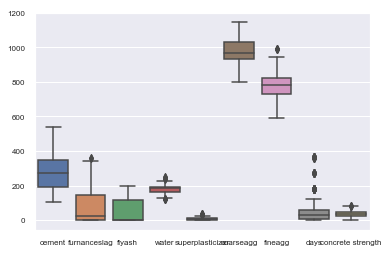

In [47]:
#we gropup the data by concrete strength because tjat is our parameter of interest. I used box plot to plot the outliers in the data set.
group = df.groupby('concrete strength')
list(group)

sns.set(rc={'font.size': 8, 'axes.labelsize': 8, 'legend.fontsize': 8.0, 
    'axes.titlesize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8})
sns.boxplot(data = df)

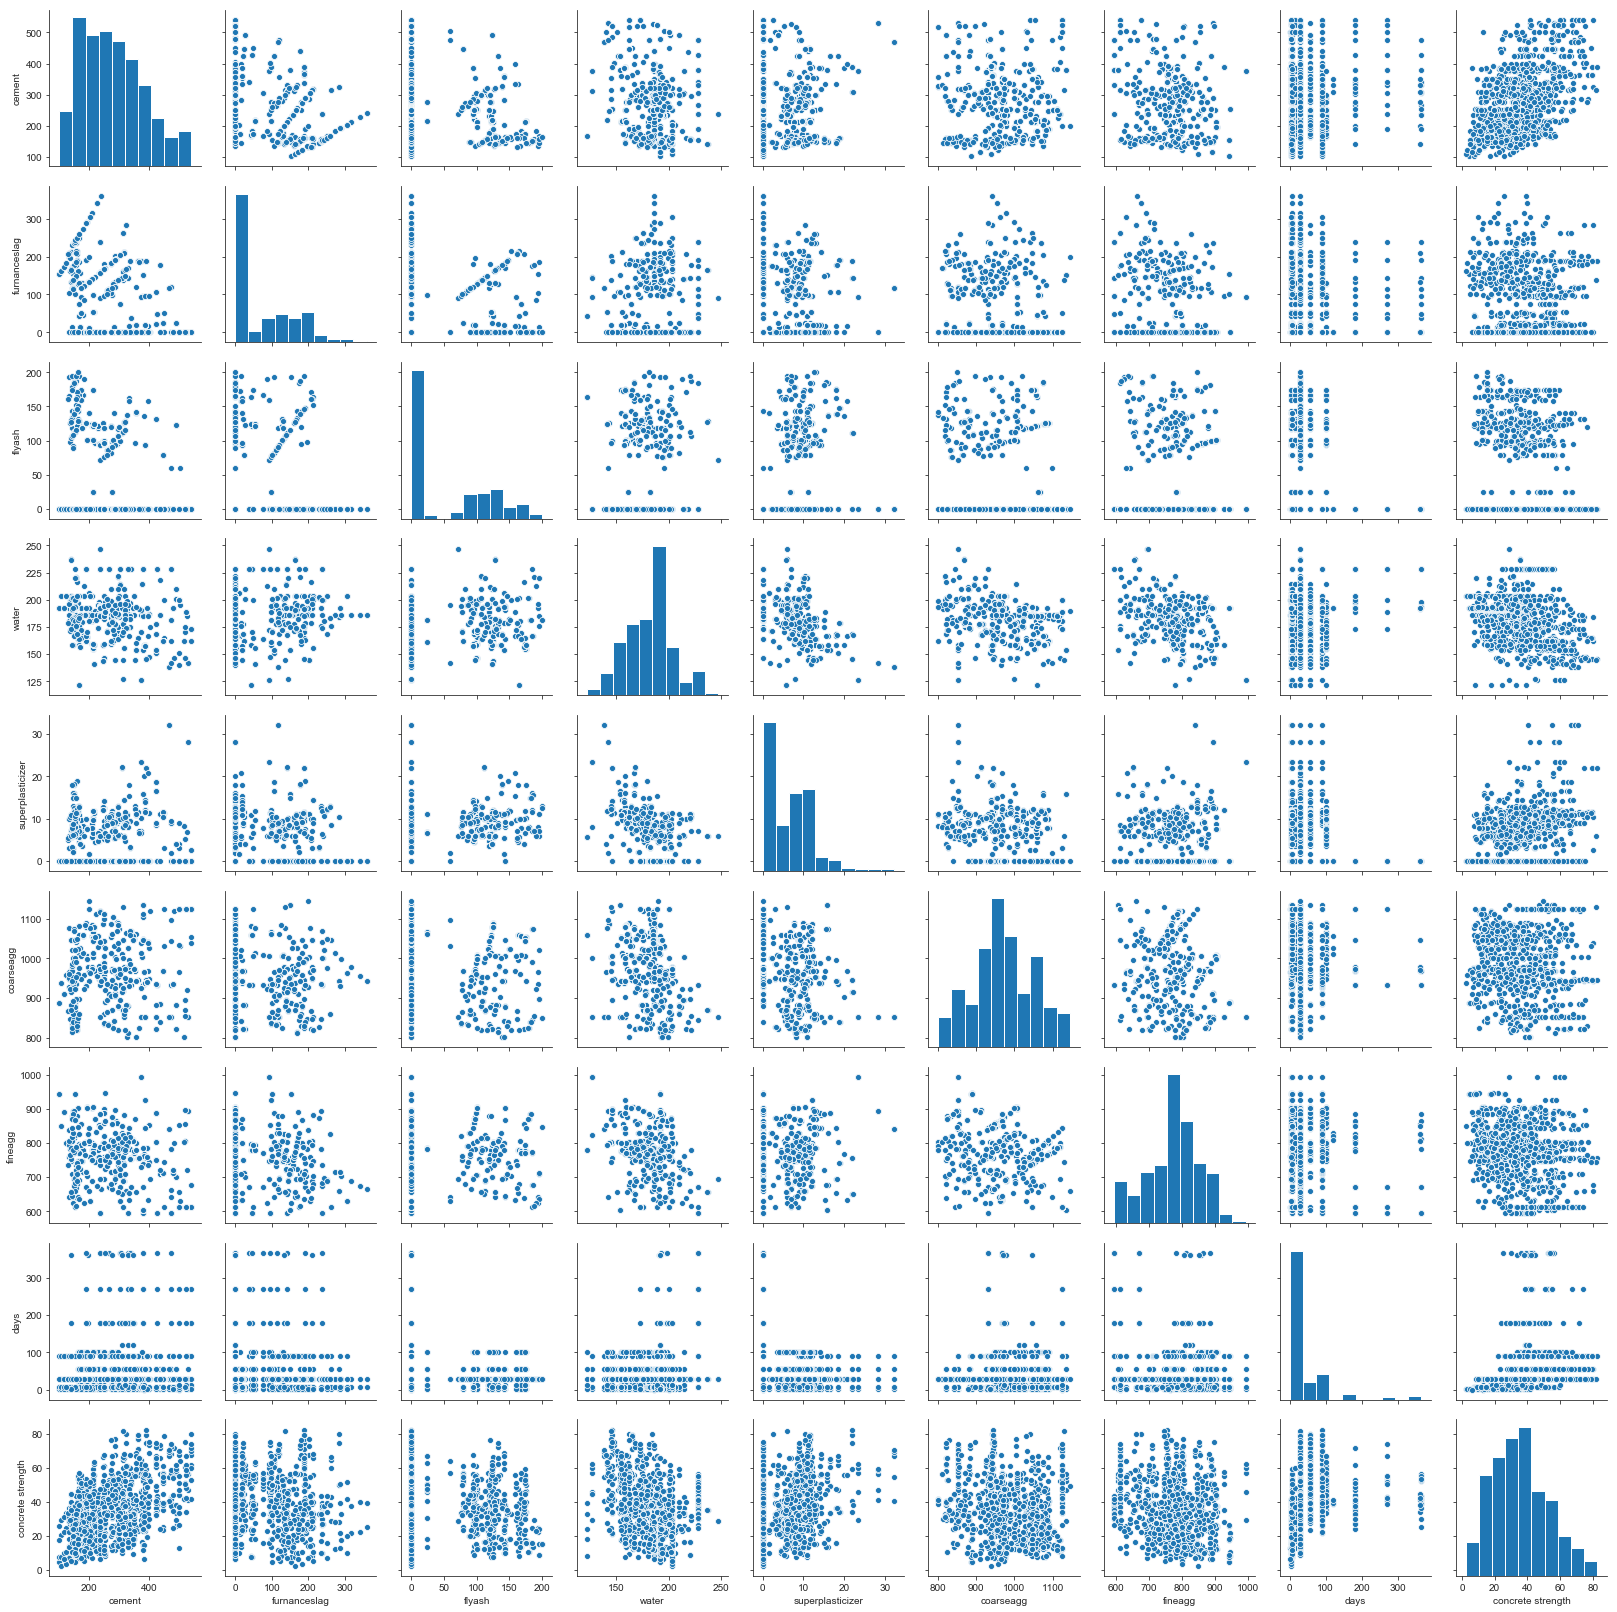

In [20]:
#i used pair plot to show how the overall distribution and correlation 
sns.pairplot(df)

In [35]:
#find the correlation values and plot it.
corr = df.corr()
corr.style.background_gradient()


,cement,furnanceslag,flyash,water,superplasticizer,coarseagg,fineagg,days,concrete strength
cement,1,-0.275216,-0.397467,-0.0815867,0.0923862,-0.109349,-0.222718,0.081946,0.497832
furnanceslag,-0.275216,1,-0.32358,0.107252,0.0432704,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.32358,1,-0.256984,0.377503,-0.00996083,0.0791085,-0.154371,-0.105755
water,-0.0815867,0.107252,-0.256984,1,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.0923862,0.0432704,0.377503,-0.657533,1,-0.265999,0.222691,-0.1927,0.366079
coarseagg,-0.109349,-0.283999,-0.00996083,-0.182294,-0.265999,1,-0.178481,-0.00301588,-0.164935
fineagg,-0.222718,-0.281603,0.0791085,-0.450661,0.222691,-0.178481,1,-0.156095,-0.167241
days,0.081946,-0.044246,-0.154371,0.277618,-0.1927,-0.00301588,-0.156095,1,0.328873
concrete strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1


State, in your own words/understanding, the central limit theorem.

Central limit theorm transforms the data into normal distribution as the sample size increases. It is nothing but the average of sam

Run a numerical experiment, using the compressive strength variable, that demonstrates the central limit theorem at work.

##Solution:
This problem i have applied CLT on the concrete data set, out of this data set i have choosen concrete strength column to perform CLT. First we plot a histogram for our data set and we observe that the data is not normally distributed (we can say this observing the curve). It is skewed more to the left. Hence we apply the central limit theorm which lies around 35.8 (mean). So the data is distribute d

/home/campus24/skrithi/.local/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


mean of concrete strength, mu = 35.817961165048544


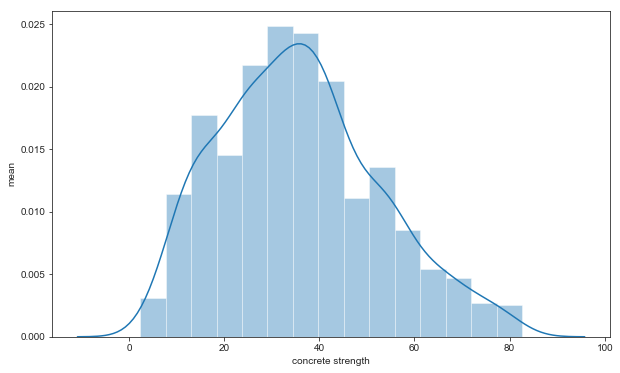

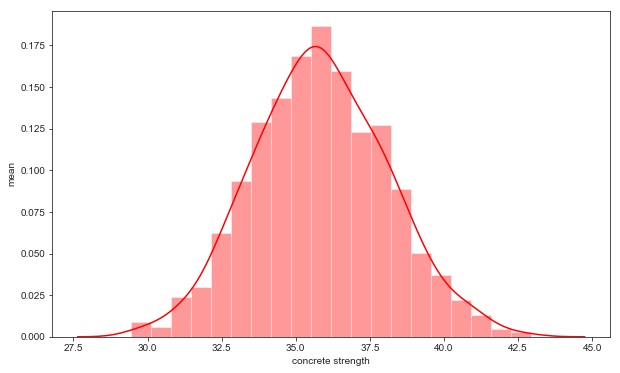

In [8]:
x = df['concrete strength']#selecting the data frame concrete strength and assigning to x
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)#setting the figure size hepls the final documet look neat

w = sns.distplot(x, bins=15 )#plotting histogram and kde 
w.set(xlabel='concrete strength',ylabel='mean')
m = x.mean();#finding the mean

print("mean of concrete strength, mu = " + str(m))#    
N = 1000 #number of tests to perform
n = 50 #random sapling
means = [0] * N#finding the mean
      
# a for loop to perform the CLT 1000 times and we initialized the values earlier  
   
    
for i in range(N):
    observations = np.random.choice(x.index.values,n)
    sampled_pop = x.loc[observations]
    means[i] = sampled_pop.mean()  
#plotting the distance plot after CLT   

sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
final = sns.distplot(means, 20, color ='red')#we can observe the distribution of data after CLT
final.set(xlabel='concrete strength',ylabel='mean')
plt.show()


Suppose that a random sample of 60 observations are chosen. What is the probability that the sample mean of the compressive strength is less than 20 MPs?

#Solution:
In the plot i plooted the mean, the distribution and the probability curve for the values less than 20.

mean of concrete strength, mu = 35.199
mean = 34.9732, standard deviation of distribution = 2.3693


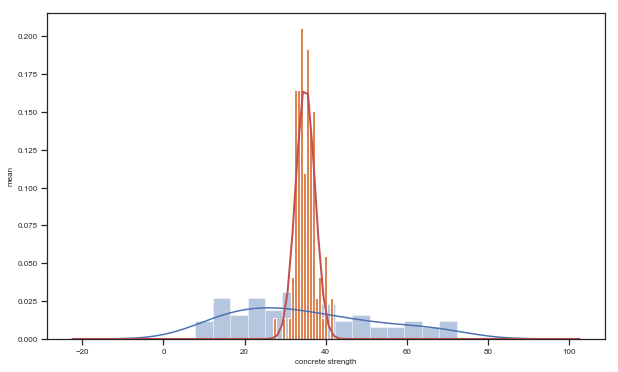

In [268]:
x = df['concrete strength']#selecting the data frame concrete strength and assigning to x
y= x.sample(n=60)
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)#setting the figure size hepls the final documet look neat

w = sns.distplot(y, bins=15 )#plotting histogram and kde 
w.set(xlabel='concrete strength',ylabel='mean')
m = y.mean();#finding the mean

print("mean of concrete strength, mu = " + str(m))#    
N = 100 #number of tests to perform
n = 60#random sapling
means = [0] * N#finding the mean
      
# a for loop to perform the CLT 1000 times and we initialized the values earlier  
   
    
for i in range(N):
    observations = np.random.choice(y.index.values,n)
    sampled_pop = y.loc[observations]
    means[i] = sampled_pop.mean()

#plotting the distance plot after CLT   
from scipy.stats import norm
xbar, s = norm.fit(means)
print("mean = %g, standard deviation of distribution = %g"%(xbar, s))
_ = plt.hist(means,bins=20,density=True )
xmin, xmax = plt.xlim()
z = np.linspace(xmin,xmax,100)
p = norm.pdf(z, xbar, s)
_ = plt.plot(z, p, 'r', linewidth = 2)


Find the 70th upper percentile of the sample mean of the sample mean compressive strength.

In [10]:
   
data_mean = pd.DataFrame(means)#saving the means into a data frame
 
p = data_mean.quantile(0.7,interpolation='higher')#upper 70% of the means
p

0    38.946
Name: 0.7, dtype: float64

Develop an appropriate hypothesis, and test using confidence intervals (see section 4.4.1)


In this problem i selected the data belonging to the concrete strength column and performed my calculation of CI on that.

('We are', 0.9, '% confident that the interval of concrete stength= ', [8.339460908081346, 63.29646142201574], 'contains the mean.')


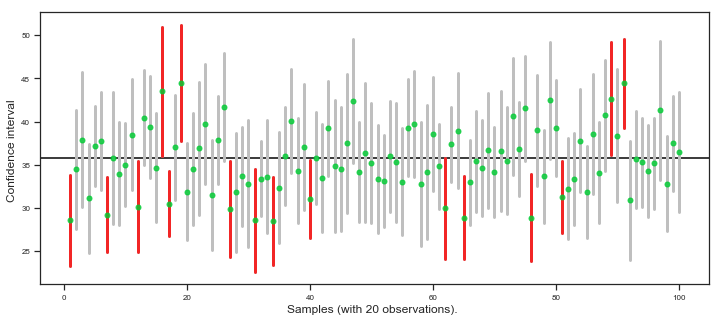

In [272]:

xbar = df["concrete strength"].mean()#find the mean
sigma = df["concrete strength"].std()#standard deviation
alpha = 0.1#setting alpha value
z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
ci = [xbar - sigma*z_alphadiv2, xbar + sigma*z_alphadiv2 ]
print ("We are", round (confidence,5) , "% confident that the interval of concrete stength= ",  ci,  "contains the mean.")

N_test = 100
n = 20

means = np.array([0.0] * N_test)   # initialize list for means
sigma = np.array([0.0] * N_test)   # initialize list for standard deviation
ci = np.array([[0.0,0.0]] * N_test)  # initialize list for confidence intervals
mu = df["concrete strength"].mean()  # true mean
for i in range(N_test):
    observations = np.random.choice(df.index.values,n)
    sampled_wines = df.loc[observations]
    means[i] = sampled_wines["concrete strength"].mean()
    sigma[i] = sampled_wines["concrete strength"].std()
    ci[i] = means[i] + np.array([-sigma[i] * z_alphadiv2/np.sqrt(n), sigma[i]*z_alphadiv2/np.sqrt(n)])
    
out1 = ci[:,0] > mu # flag CI that do not contain the "true" mean
out2 = ci[:,1] < mu # flag CI that do not contain the "true" mean
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ind = np.arange(1, N_test+1)
ax.axhline(y = mu, 
           xmin = 0, 
           xmax = N_test+1, 
           color = [0, 0, 0])

ci = np.transpose(ci)
ax.plot([ind,ind], 
        ci, 
        color = '0.75', 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out1],ind[out1]], 
        ci[:, out1], 
        color = [1, 0, 0, 0.8], 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out2],ind[out2]], 
        ci[:, out2], 
        color = [1, 0, 0, 0.8], 
        marker = '_',
        ms = 0, 
        linewidth = 3)
ax.plot(ind, 
        means, 
        color = [0, .8, .2, .8], 
        marker = '.',
        ms = 10, 
        linestyle = '')
ax.set_ylabel("Confidence interval ",
              fontsize = 12)
ax.set_xlabel('Samples (with %d observations). '  %n, 
              fontsize = 12)
n = plt.show()
   
    
    

Develop another appropriate hypothesis, and test using $p$-values (See section 4.4.2)

#in this problem i have calculated z,p values and compared the values of p to the present aplha value to check the validity of my hypothesis. 

In [12]:
mean = df["concrete strength"].mean()#mean of the data
sigma = df["concrete strength"].std()#standard deviation
print("mean = %g, sigma = %g"%(mean,sigma))
n = 1000
observations = np.random.choice(df.index.values,n)
sampleddata = df.loc[observations]
x_bar = sampleddata["concrete strength"].mean()
z = (x_bar - mean) / (sigma/np.sqrt(n))

alpha = 0.05
pvalue = 2*(1-norm.cdf(np.abs(z))) # calculating p value

print "The p-value is %g"%(pvalue)

if (pvalue < alpha):
    print "We reject the null hypothesis"
else:
    print "we have no evidence to reject the null hypothesis"




mean = 35.818, sigma = 16.7057
The p-value is 0.975927
we have no evidence to reject the null hypothesis
